In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string



In [3]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')


In [4]:
data_fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
data_fake["class"] = 0


In [7]:
data_true["class"] = 1

In [8]:
data_fake.shape, data_true.shape



((23481, 5), (21417, 5))

In [9]:
data_fake_manual_testing = data_fake.tail(10)


In [10]:
for i in range(23480, 23470, -1):data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)


SyntaxError: incomplete input (2316856839.py, line 1)

In [11]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)



In [12]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)


In [13]:
data_fake.shape, data_true.shape



((23471, 5), (21407, 5))

In [14]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1


C:\Users\madha\AppData\Local\Temp\ipykernel_6348\4264077654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\madha\AppData\Local\Temp\ipykernel_6348\4264077654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [15]:
data_fake_manual_testing.head(10)

data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)


,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
data_merge.columns



Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
data = data_merge.drop(['title','subject', 'date'], axis = 1)



In [19]:
data.isnull().sum()


text     0
class    0
dtype: int64

In [20]:
data = data.sample(frac = 1)

In [21]:
data.head()


,text,class
10668,(Reuters) - A coalition of some of the largest...,1
7309,Appearing on the The View Thursday morning was...,0
20040,"(Reuters) - On Friday, a cruise ship carrying ...",1
6398,WASHINGTON (Reuters) - U.S. President-elect Do...,1
7560,NEW YORK (Reuters) - The Clinton Foundation ha...,1


In [22]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

data.columns

data.head()


,text,class
0,(Reuters) - A coalition of some of the largest...,1
1,Appearing on the The View Thursday morning was...,0
2,"(Reuters) - On Friday, a cruise ship carrying ...",1
3,WASHINGTON (Reuters) - U.S. President-elect Do...,1
4,NEW YORK (Reuters) - The Clinton Foundation ha...,1


In [23]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\\W", " ", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n' , '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text
data['text'] = data['text'].apply(wordopt)


In [24]:
x = data['text']
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)
from sklearn.feature_extraction.text import TfidfVectorizer
  


In [25]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)



In [26]:
from sklearn.linear_model import LogisticRegression



In [27]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [28]:
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
0.9861853832442068
print(classification_report(y_test, pred_lr))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5894
           1       0.98      0.99      0.98      5326

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [29]:
def manual_testing(news):
    testing_news = {"text":[news]}
    news_def_test = pd.DataFrame(testing_news)
    news_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    pred_dt = DT.predict(new_xv_test)
    pred_gb = GB.predict(new_xv_test)
    pred_rf = RF.predict(new_xv_test)



In [30]:
 return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]),output_label(pred_GB[0]),output_label(pred_RF[0]))) 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


SyntaxError: 'return' outside function (4055251276.py, line 1)

In [31]:
def manual_testing(news):
    testing_news = {"text":[news]}
    news_def_test = pd.DataFrame(testing_news)
    news_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    pred_dt = DT.predict(new_xv_test)
    pred_gb = GB.predict(new_xv_test)
    pred_rf = RF.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]),output_label(pred_GB[0]),output_label(pred_RF[0]))) 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [32]:
def manual_testing(news):
    testing_news = {"text":[news]}
    news_def_test = pd.DataFrame(testing_news)
    news_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = LR.predict(new_xv_test)
    pred_dt = DT.predict(new_xv_test)
    pred_gb = GB.predict(new_xv_test)
    pred_rf = RF.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_label(pred_LR[0]),output_label(pred_GB[0]),output_label(pred_RF[0]))) 


In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


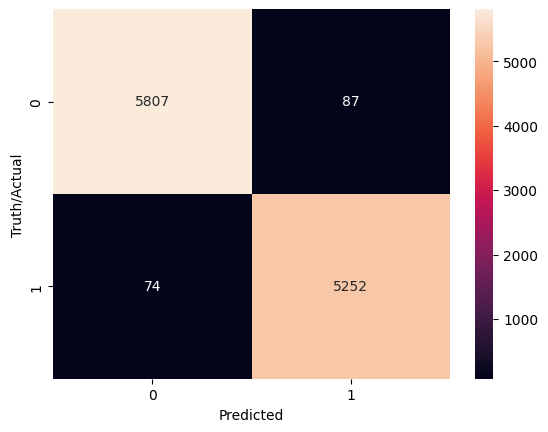

In [35]:
matrix = confusion_matrix(y_test, pred_lr)
sns.heatmap(matrix,annot = True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth/Actual')
plt.show()
